## 4.1 Animal species

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [57]:
animals = 32
dim = 84
hidden_nodes = 100

In [58]:
def read_data(file='animals'):
    filename = "data/data/animals.dat"
    inputs = np.zeros((animals, dim))
    with open(filename) as f:
        data = f.read().split(',')
        for i in range(animals):
            inputs[i,:] = data[i*dim : (i+1)*dim]
        return inputs

In [59]:
def generate_weights(size, sigma=0.01):
    return np.random.normal(0, sigma, size)

In [60]:
weights = generate_weights((hidden_nodes, dim))
inputs = read_data()

In [61]:
def neighborhood(idx, epoch, max_range):
    nbrhd_range = int(50 - epoch*2.5)
    nbrhd_min = np.max([0, idx-nbrhd_range])
    nbrhd_max = np.min([max_range, idx+nbrhd_range])
    return np.arange(nbrhd_min, nbrhd_max)

In [62]:
def train_SOM_animals(inputs, weights, lr=0.2, epochs=20):
    for epoch in range(epochs):
        for i in range(animals):
            distances = np.sum(np.square(inputs[i,:]-weights), axis=1) #input [84,] , weights[100,84]
            winner = np.argmin(distances)
            weights[winner,:] = weights[winner,:] + lr * (inputs[i,:] - weights[winner,:])
            # Update weights in neighborhood
            neighbors = neighborhood(winner, epoch, hidden_nodes)
            weights[neighbors,:] = weights[neighbors,:] + 0.5*lr * (inputs[i,:] - weights[neighbors,:])
    return weights

In [34]:
def train_SOM_animals(inputs, weights, lr=0.2, epochs=20):
    for epoch in range(epochs):
        for i in range(animals):
            distances = np.sum(np.square(inputs[i,:]-weights), axis=1) #input [84,] , weights[100,84]
            winner = np.argmin(distances)
            # Update weights in neighborhood
            neighbors = neighborhood(winner, epoch, hidden_nodes)
            weights[neighbors,:] = weights[neighbors,:] + lr * (inputs[i,:] - weights[neighbors,:])
    return weights

In [63]:
w_trained = train_SOM_animals(inputs, weights)

In [64]:
def get_animal_names():
    with open("data/data/animalnames.txt") as f:
            mylist = f.read().splitlines() 
    return mylist

In [65]:
def print_som_results(props, weights):
    pos = {}
    for animalNdx in range(animals):
        similarity = np.sum(np.square(props[animalNdx,:] - weights), axis=1)
        # similarity = [100]
        pos[animalNdx] = np.argmin(similarity)
    sorted_pos = sorted(pos.items(), key=lambda kv: kv[1])
    animal_names = get_animal_names()
    for ndx in sorted_pos:
        print(animal_names[ndx[0]])

In [66]:
animal_names = get_animal_names()
print_som_results(inputs, w_trained)

bat
elephant
camel
giraffe
pig
cat
lion
antelop
horse
ape
kangaroo
skunk
rat
dog
hyena
rabbit
bear
walrus
frog
crocodile
seaturtle
penguin
duck
pelican
ostrich
spider
housefly
butterfly
moskito
beetle
dragonfly
grasshopper


## 4.2 city tour

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
features = 2
cities = 10
hidden_nodes = 20

In [17]:
def get_cities(file='cities'):
    filename = "data/data/cities.dat"
    with open(filename) as f:
        lines = f.readlines()[4:]
        raw_data = [line.replace(";", '').replace('\n', '').split(",") for line in lines]
        data = np.array([ elem for singleList in raw_data for elem in singleList])
        data = np.reshape(data, (cities,features))
        data = data.astype(np.float)
    return data

In [20]:
def generate_weights(size, sigma=0.01):
    #return np.random.normal(0, sigma, size)
    return np.random.uniform(0, 1, size)

In [94]:
def neighborhood(idx, epoch, max_range):
    nb_range = int(2 - (epoch)//10)
    nb_list = [idx]
    if(nb_range==2):
        if (idx==0):
            nb_list.append(idx+1)
            nb_list.append(idx+2)
            nb_list.append(hidden_nodes-1)
            nb_list.append(hidden_nodes-2)
        elif(idx==1):
            nb_list.append(idx+1)
            nb_list.append(idx+2)
            nb_list.append(0)
            nb_list.append(hidden_nodes-1)
        elif(idx==hidden_nodes-1):
            nb_list.append(idx-1)
            nb_list.append(idx-2)
            nb_list.append(0)
            nb_list.append(1)
        elif(idx==hidden_nodes-2):
            nb_list.append(idx-1)
            nb_list.append(idx-2)
            nb_list.append(idx+1)
            nb_list.append(0)
        else:
            nb_list.append(idx-1)
            nb_list.append(idx-2)
            nb_list.append(idx+1)
            nb_list.append(idx+2)
    if(nb_range==1):
        if (idx==0):
            nb_list.append(idx+1)
            nb_list.append(hidden_nodes-1)
        elif(idx==hidden_nodes-1):
            nb_list.append(idx-1)
            nb_list.append(0)
        else:
            nb_list.append(idx-1)
            nb_list.append(idx+1)
    return nb_list

In [95]:
neighborhood(9, 25, hidden_nodes)

[9]

In [97]:
def train_SOM_cities(inputs, weights, step_size=0.2, epochs=50, eta=0.2):
    for epoch in range(epochs):
        for cityNdx in range(cities):
            # Calculate similarity between input pattern and weights
            #  Ignore Sqrt since we only care about the winner
            similarity = np.sum(
                np.square(inputs[cityNdx,:]-weights), axis=1)
            # Select winner
            winner = np.argmin(similarity)
            # Update weights in neighborhood
            nbrs = neighborhood(winner, epoch, hidden_nodes)
            weights[nbrs,:] = weights[nbrs,:] + \
              eta*(inputs[cityNdx,:] - weights[nbrs,:])
    return weights

In [98]:
weights = generate_weights((hidden_nodes, features))
inputs = get_cities()
print(inputs)

[[0.4    0.4439]
 [0.2439 0.1463]
 [0.1707 0.2293]
 [0.2293 0.761 ]
 [0.5171 0.9414]
 [0.8732 0.6536]
 [0.6878 0.5219]
 [0.8488 0.3609]
 [0.6683 0.2536]
 [0.6195 0.2634]]


In [99]:
w_trained = train_SOM_cities(inputs, weights)

In [100]:
plt.rcParams["figure.figsize"] = (10,5)

def plot_tour(inputs, weights):
    outputs = []
    for cityNdx in range(cities):
        similarity = np.sum(
            np.square(inputs[cityNdx,:] - weights), axis=1)
        indice = np.argmin(similarity)
        outputs.append(weights[indice,:])
    outputs.append(inputs[0,:])
    outputs = np.asarray(outputs)
    #print(outputs)
    plt.figure()
    plt.scatter(inputs[:,0],inputs[:,1],color='red',label ='Training points')
    plt.plot(outputs[:,0],outputs[:,1], color='blue', label = 'The tour')
    plt.legend()
    plt.show()

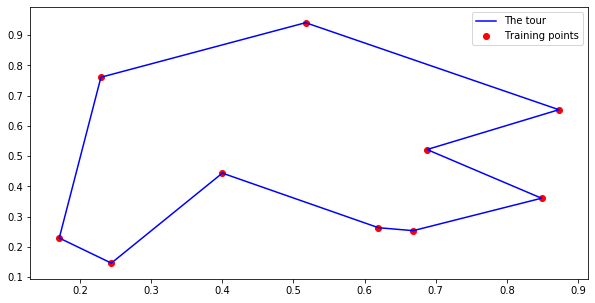

In [101]:
plot_tour(inputs, weights)

## 4.3 data clustering

In [14]:
import os

def get_data(file_name):
    if file_name == 'votes.dat':
        file_path = os.path.join("data/data", file_name)
        return np.loadtxt(file_path, comments="%", delimiter=',').reshape((349, 31))
    else:
        file_path = os.path.join("data/data", file_name)
        data = np.loadtxt(file_path,comments="%")
    return data

In [15]:
hidden_nodes = 10*10
features = 31
n_MPs = 349

In [16]:
def is_neighbor(idx,winner,size):
    y_idx = idx // 10
    x_idx = idx % 10
    y_winner = winner / 10
    x_winner = winner % 10
    return np.abs(y_idx - y_winner) + np.abs(x_idx - x_winner) <= size

In [17]:
for i in range(20):
    neighbourhood_size = round(20*((20-i)/20))
    print(neighbourhood_size)

20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


In [32]:
def train_SOM_MPs(inputs, weights, epochs=20, eta=0.2):
    for epoch in range(epochs):
        nb_range =  round(epochs*((epochs-epoch)/epochs))
        for m in range(349):
            # Calculate similarity between input pattern and weights
            #  Ignore Sqrt since we only care about the winner
            similarity = np.sum(
                np.square(inputs[m,:]-weights), axis=1)
            # Select winner
            winner = np.argmin(similarity)
            # Update weights in neighborhood
            for n in range(100):
                if is_neighbor(n,winner,nb_range):
                    weights[n,:] = weights[n,:] + \
                      eta*(inputs[m,:] - weights[n,:])
    return weights

In [55]:
votes = get_data('votes.dat')
genders = get_data('mpsex.dat')
parties = get_data('mpparty.dat')
districts = get_data('mpdistrict.dat')
weights = generate_weights((hidden_nodes, features))
print(votes.shape)
print(genders.shape)
print(districts)

(349, 31)
(349,)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.
  7.  7.  8.  8.  8.  8.  8.  8.  8.  8.  8.  9.  9. 10. 10. 10. 10. 10.
 10. 11. 11. 11. 11. 11. 11. 11. 11. 11. 12. 12. 12. 12. 12. 12. 12. 12.
 12. 12. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 14. 14.
 14. 14. 14. 14. 14. 14. 14. 14. 14. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16.
 16. 16. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 18. 18. 18.
 18. 18. 18. 18. 18. 18. 18. 19. 1

In [34]:
trained_weights = train_SOM_MPs(votes,weights)

In [53]:
from matplotlib.lines import Line2D
plt.rcParams["figure.figsize"] = (8,5)
def analyse(votes, w):
    genders = np.loadtxt('data/data/mpsex.dat', comments="%")
    parties = np.loadtxt('data/data/mpparty.dat', comments="%")
    districts = np.loadtxt('data/data/mpdistrict.dat', comments="%")
    pos = np.zeros(349)
    genders_out = [[] for i in range(100)]
    parties_out = [[] for i in range(100)]
    districts_out = [[] for i in range(100)]

    for i in range(len(pos)):
        similarity = np.sum(np.square(votes[i,:]-w), axis=1)
        winner = np.argmin(similarity)
        pos[i] = winner
        genders_out[winner].append(genders[i])
        parties_out[winner].append(parties[i])
        districts_out[winner].append(districts[i])
    unique, counts = np.unique(pos, return_counts=True)

    # Plot Genders
    fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
    colors = ['red','blue']
    labels = ["female", "male"]
    for i in range(len(unique)):
        y = unique[i] // 10
        x = unique[i] % 10
        mean_gender = np.mean(genders_out[int(unique[i])]) # this nodes's average
        genders, genders_count = np.unique(genders_out[int(unique[i])], return_counts=True)
        ax.annotate(str(int(np.max(genders_count)/len(genders_out[int(unique[i])])*100)) + "%", xy=(x+1, y+1), fontsize=7, ha="center")
        circle = plt.Circle((x+1, y+1), counts[i]/100, color=(mean_gender, 0, (1-mean_gender)))
        ax.add_artist(circle)
    legend_elements = []
    for i in range(2):
        legend_elements.append(Line2D([0], [0], marker='o', color='w', label=labels[i],
                          markerfacecolor=colors[i], markersize=5))
    ax.legend(handles=legend_elements, loc='lower left')
    plt.ylim(0, 11)
    plt.xlim(0, 11)
    plt.title("Genders in proportions per node")
    fig.savefig('mps_gender.png')

    # Plot Parties
    colors = ['r', 'y', 'c', 'pink', 'm', 'g', 'b','orange']
    labels = ["0", "1", "2", "3", "4", "5", "6", "7"]
    fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
    for i in range(len(unique)):
        y = unique[i] // 10
        x = unique[i] % 10
        parties, parties_count = np.unique(parties_out[int(unique[i])], return_counts=True)
        main_party = int(parties[np.argmax(parties_count)])
        circle = plt.Circle((x+1, y+1), counts[i]/100, color=colors[main_party])
        ax.annotate(str(int(np.max(parties_count)/len(parties_out[int(unique[i])])*100)) + "%", xy=(x+1, y+1), fontsize=7, ha="center")
        ax.add_artist(circle)
    legend_elements = []
    for i in range(8):
        legend_elements.append(Line2D([0], [0], marker='o', color='w', label=labels[i],
                          markerfacecolor=colors[i], markersize=5))
    ax.legend(handles=legend_elements, loc='lower left')
    plt.ylim(0, 11)
    plt.xlim(-2, 11)
    plt.title("Dominating parties in proportions per node")
    fig.savefig('mps_parties.png')

    # Plot Districts
    fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
    for i in range(len(unique)):
        y = unique[i] // 10
        x = unique[i] % 10
        districts = np.unique(districts_out[int(unique[i])])
        circle = plt.Circle((x+1, y+1), counts[i]/100, color='y')
        ax.annotate(str(int(len(districts))), xy=(x+1, y+1), fontsize=7, ha="center")
        ax.add_artist(circle)
    plt.ylim(0, 11)
    plt.xlim(0, 11)
    plt.title("Number of different district per node")
    fig.savefig('mps_district.png')

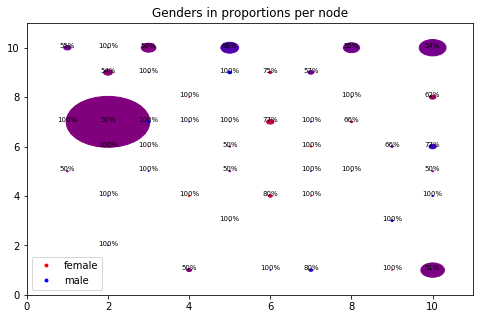

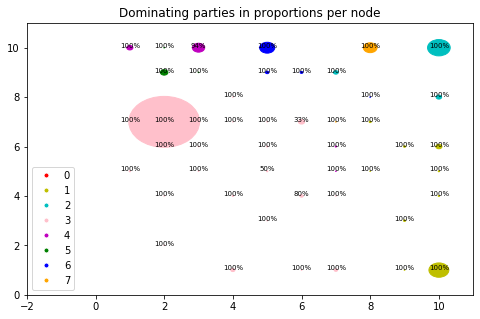

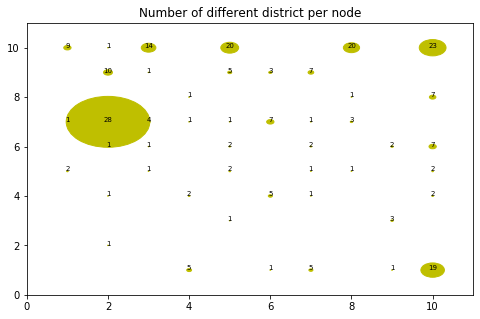

In [54]:
analyse(votes, trained_weights)

Epoch 0
-> n: 20
-> lr: 0.2
-> lrn: 0.1
Epoch 1
-> n: 20
-> lr: 0.5
-> lrn: 0.5
Epoch 2
-> n: 19
-> lr: 0.4829681644624228
-> lrn: 0.4829681644624228
Epoch 3
-> n: 18
-> lr: 0.4649024713065809
-> lrn: 0.4649024713065809
Epoch 4
-> n: 17
-> lr: 0.44573248080966416
-> lrn: 0.44573248080966416
Epoch 5
-> n: 16
-> lr: 0.42538763401805474
-> lrn: 0.42538763401805474
Epoch 6
-> n: 15
-> lr: 0.4037999116148849
-> lrn: 0.4037999116148849
Epoch 7
-> n: 14
-> lr: 0.38090780370834904
-> lrn: 0.38090780370834904
Epoch 8
-> n: 13
-> lr: 0.35666209718238334
-> lrn: 0.35666209718238334
Epoch 9
-> n: 12
-> lr: 0.3310341418551564
-> lrn: 0.3310341418551564
Epoch 10
-> n: 11
-> lr: 0.30402742338032707
-> lrn: 0.30402742338032707
Epoch 11
-> n: 10
-> lr: 0.2756934091433485
-> lrn: 0.2756934091433485
Epoch 12
-> n: 9
-> lr: 0.24615264989088037
-> lrn: 0.24615264989088037
Epoch 13
-> n: 8
-> lr: 0.2156218230359179
-> lrn: 0.2156218230359179
Epoch 14
-> n: 7
-> lr: 0.18444643610924102
-> lrn: 0.184446436109

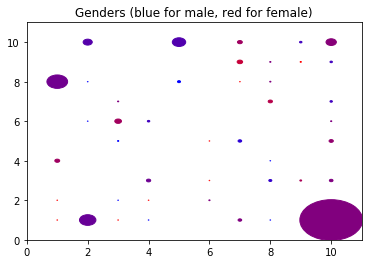

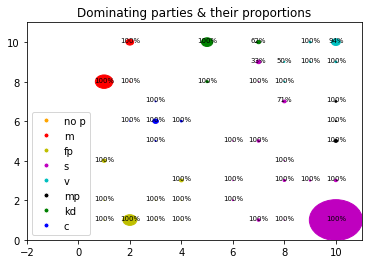

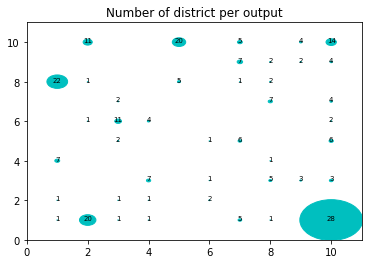

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from matplotlib.lines import Line2D


def create_weight_matrix():
    w = np.random.uniform(0, 1, (100, 31))
    return w


def find_closest_w_row(x, w):
    d = np.zeros(100)
    for i in range(100):
        d[i] = euclidean(x, w[i, :])
    return np.argmin(d)


def is_neighbour(i, ind, size):
    """
    :param i: node index to check if it is a neighbour
    :param ind: checking if i is a neighbour of this node ind.
    :param size: size of neighbourhood. Ex size = 1 means i-1 and i+1 are neighbours.
    :return: True if it is a neighbour, False otherwise
    """
    y_i = i // 10
    x_i = i % 10
    y_ind = ind / 10
    x_ind = ind % 10
    return np.abs(y_ind - y_i) + np.abs(x_ind - x_i) <= size


def update_w(x, w, ind, eta, eta_n, size):
    """
    updates winner and its neighbours
    :param w:
    :param ind:
    :return:
    """
    for i in range(100):
        if i == ind:
            w[i, :] += eta * (x - w[i, :])
        else:
            w[i, :] += eta_n * is_neighbour(i, ind, size) * (x - w[i, :])
    return w


def move_neurons(eta, eta_n, votes, size, w):
    for i in range(349):
        ind = find_closest_w_row(votes[i, :], w)
        w = update_w(votes[i, :], w, ind, eta, eta_n, size)


def train(votes, eta=0.2, nb_epochs=20):
    alpha = 0.5
    eta_n = eta / 2
    w = create_weight_matrix()
    neighbourhood_size = 20
    for i in range(nb_epochs):
        print("Epoch", i)
        print("-> n:", neighbourhood_size)
        print("-> lr:", eta)
        print("-> lrn:", eta_n)
        move_neurons(eta, eta_n, votes, neighbourhood_size, w)
        # reduce learning rate and neighbourhood
        eta = alpha * eta**(i / nb_epochs)
        eta_n = alpha * eta_n**(i / nb_epochs)
        neighbourhood_size = round(20*((nb_epochs-i)/nb_epochs))
    return w


def analyse(votes, w):
    genders = np.loadtxt('data/data/mpsex.dat', comments="%")
    parties = np.loadtxt('data/data/mpparty.dat', comments="%")
    districts = np.loadtxt('data/data/mpdistrict.dat', comments="%")
    pos = np.zeros(349)
    genders_out = [[] for i in range(100)]
    parties_out = [[] for i in range(100)]
    districts_out = [[] for i in range(100)]

    for i in range(len(pos)):
        ind = find_closest_w_row(votes[i, :], w)
        pos[i] = ind
        genders_out[ind].append(genders[i])
        parties_out[ind].append(parties[i])
        districts_out[ind].append(districts[i])
    unique, counts = np.unique(pos, return_counts=True)

    # Plot Genders
    fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
    for i in range(len(unique)):
        y = unique[i] // 10
        x = unique[i] % 10
        mean_gender = np.mean(genders_out[int(unique[i])])
        circle = plt.Circle((x+1, y+1), counts[i]/100, color=(mean_gender, 0, (1-mean_gender)))
        ax.add_artist(circle)
    plt.ylim(0, 11)
    plt.xlim(0, 11)
    plt.title("Genders (blue for male, red for female)")
    #fig.savefig('images/mps_gender.png')

    # Plot Parties
    colors = ['orange', 'r', 'y', 'm', 'c', 'k', 'g', 'b']
    labels = ["no p", "m", "fp", "s", "v", "mp", "kd", "c"]
    fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
    for i in range(len(unique)):
        y = unique[i] // 10
        x = unique[i] % 10
        parties, parties_count = np.unique(parties_out[int(unique[i])], return_counts=True)
        main_party = int(parties[np.argmax(parties_count)])
        circle = plt.Circle((x+1, y+1), counts[i]/100, color=colors[main_party])
        ax.annotate(str(int(np.max(parties_count)/len(parties_out[int(unique[i])])*100)) + "%", xy=(x+1, y+1), fontsize=7, ha="center")
        ax.add_artist(circle)
    legend_elements = []
    for i in range(8):
        legend_elements.append(Line2D([0], [0], marker='o', color='w', label=labels[i],
                          markerfacecolor=colors[i], markersize=5))
    ax.legend(handles=legend_elements, loc='lower left')
    plt.ylim(0, 11)
    plt.xlim(-2, 11)
    plt.title("Dominating parties & their proportions")
    #fig.savefig('images/mps_parties.png')

    # Plot Districts
    fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
    for i in range(len(unique)):
        y = unique[i] // 10
        x = unique[i] % 10
        districts = np.unique(districts_out[int(unique[i])])
        circle = plt.Circle((x+1, y+1), counts[i]/100, color='c')
        ax.annotate(str(int(len(districts))), xy=(x+1, y+1), fontsize=7, ha="center")
        ax.add_artist(circle)
    plt.ylim(0, 11)
    plt.xlim(0, 11)
    plt.title("Number of district per output")
    #fig.savefig('images/mps_district.png')


def import_votes():
    return np.loadtxt('data/data/votes.dat', comments="%", delimiter=',').reshape((349, 31))


def main():
    votes = import_votes()
    w = train(votes)
    analyse(votes, w)


if __name__ == "__main__":
    main()